In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
import io

wine_data = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
print(f"The shape of the dataset is {wine_data.shape}")
print(f"The size of the dataset is {len(wine_data)}")

The shape of the dataset is (1599, 12)
The size of the dataset is 1599


In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


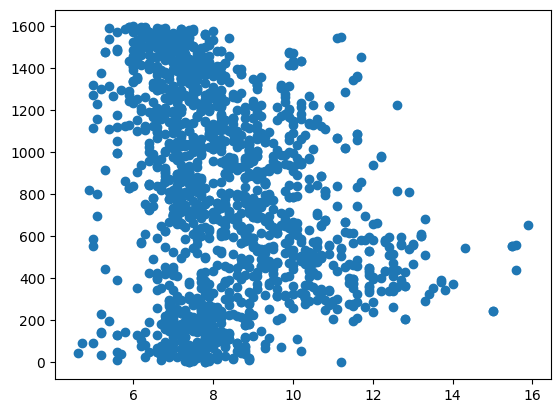

In [10]:
plt.scatter(wine_data["fixed acidity"], range(0,len(wine_data)))

<Axes: ylabel='Frequency'>

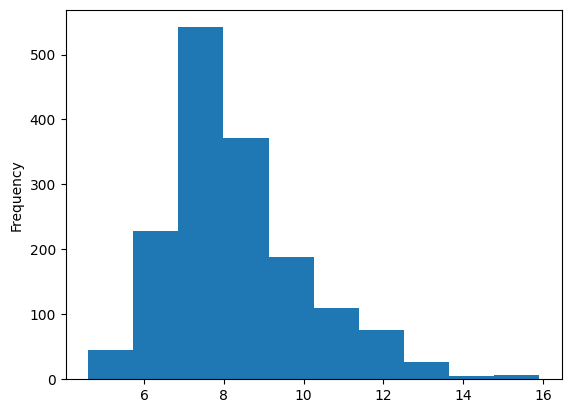

In [15]:
wine_data["fixed acidity"].plot(kind="hist")

<Axes: >

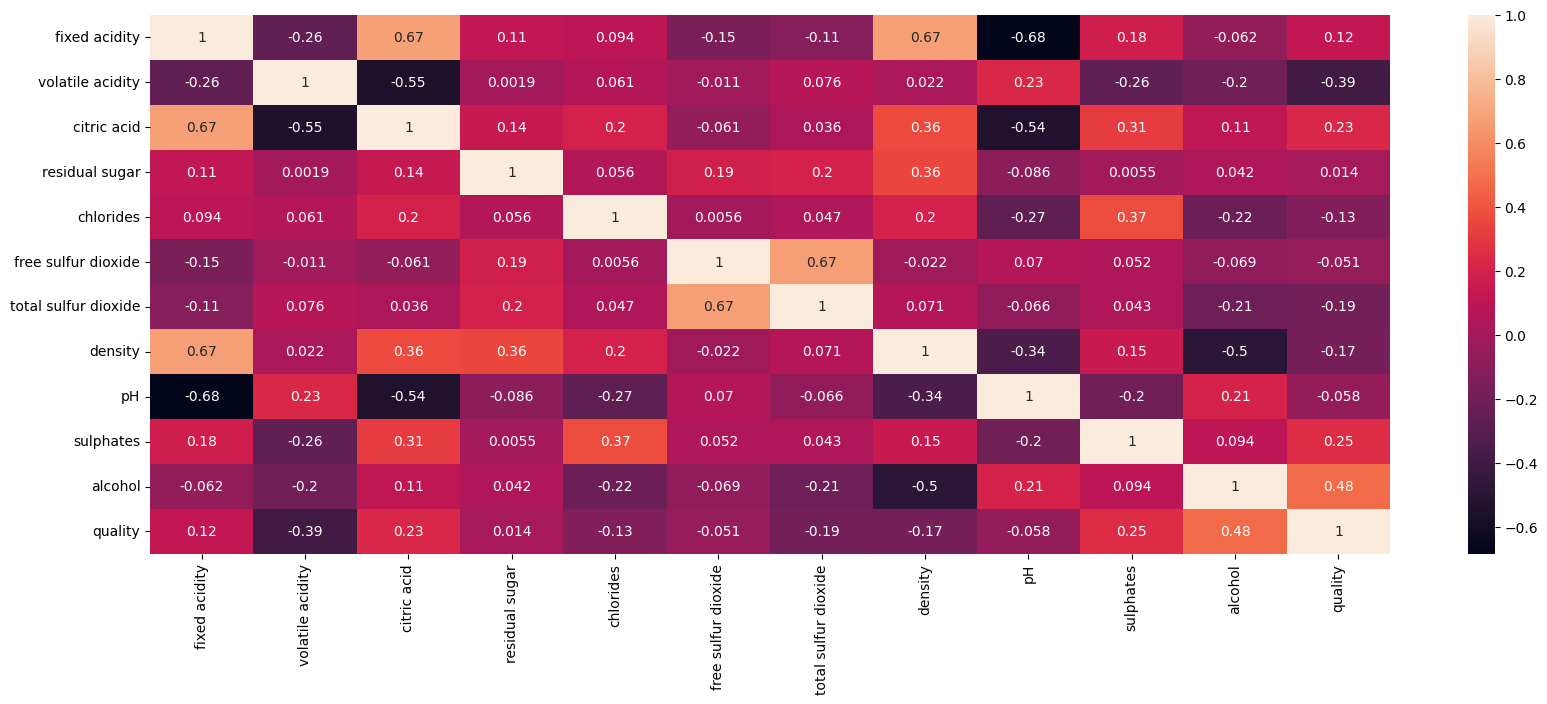

In [17]:
plt.figure(figsize=(20,7))
sns.heatmap(wine_data.corr(),annot=True)

### Preprocessing the data

In [18]:
wine_data.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [19]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

minmaxscaler.fit(wine_data[wine_data.columns[:-1]])

MinMaxScaler()

In [20]:
scaled = minmaxscaler.transform(wine_data[wine_data.columns[:-1]])
scaled

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [21]:
scaled_data = pd.DataFrame(scaled, columns=wine_data.columns[:-1])
scaled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [22]:
### The quality

def resolve_quality(value):
  if value>=6:
    return 1
  else:
    return 0

quality = wine_data["quality"].apply(lambda x: resolve_quality(x))

In [26]:
quality = pd.DataFrame(quality)
quality.head()

,quality
0,0
1,0
2,0
3,1
4,0


In [27]:
wine_data_preprocessed = pd.concat([scaled_data, quality],axis=1)
wine_data_preprocessed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X = wine_data_preprocessed.drop("quality",axis=1)
y = wine_data_preprocessed["quality"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [30]:
print(f"The length of X_train is {len(X_train)} and the length of y_train is {len(y_train)}")
print(f"The length of x_test is {len(X_test)} and the length of y_Test is {len(y_test)}")

The length of X_train is 1119 and the length of y_train is 1119
The length of x_test is 480 and the length of y_Test is 480


#### HELPER FUNCTION FOR ACCURACY CHECKK

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def evaluate_model(y_test, predictions):
  print("The confucion Matrix - ")
  print(confusion_matrix(y_test,predictions))
  print('\n')

  print("Classification report - ")
  print(classification_report(y_test,predictions))
  print('\n')

  print("Accuracy Score - ")
  print(accuracy_score(y_test,predictions))
  print('\n')

# 1.Logistic Regression Model - 72.083 % Accuracy


In [31]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

In [32]:
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [36]:
evaluate_model(y_test, log_preds)

The confucion Matrix - 
[[156  57]
 [ 77 190]]


Classification report - 
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       213
           1       0.77      0.71      0.74       267

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



Accuracy Score - 
0.7208333333333333




In [37]:
len(log_preds)

480

# Decission Tree Model - 75.625

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtree_classifier = DecisionTreeClassifier()
dtree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
dtree_preds = dtree_classifier.predict(X_test)

In [46]:
evaluate_model(y_test, dtree_preds)

The confucion Matrix - 
[[143  70]
 [ 47 220]]


Classification report - 
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       213
           1       0.76      0.82      0.79       267

    accuracy                           0.76       480
   macro avg       0.76      0.75      0.75       480
weighted avg       0.76      0.76      0.75       480



Accuracy Score - 
0.75625




# Random Forest Model - 81%

In [47]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [48]:
rnd_preds = rnd_clf.predict(X_test)

In [50]:
evaluate_model(y_test, rnd_preds)

The confucion Matrix - 
[[152  61]
 [ 66 201]]


Classification report - 
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       213
           1       0.77      0.75      0.76       267

    accuracy                           0.74       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.74      0.74      0.74       480



Accuracy Score - 
0.7354166666666667




In [52]:
#Without unwanted hyperparameters
rnd_clf_2 = RandomForestClassifier(n_estimators=500)
rnd_clf_2.fit(X_train, y_train)
rnd_preds_2 = rnd_clf_2.predict(X_test)

In [55]:
evaluate_model(y_test, rnd_preds_2)

The confucion Matrix - 
[[162  51]
 [ 48 219]]


Classification report - 
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       213
           1       0.81      0.82      0.82       267

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



Accuracy Score - 
0.79375




In [56]:
# less estimators
rnd_3 = RandomForestClassifier(n_estimators=128)
rnd_3.fit(X_train, y_train)
rnd_3_preds = rnd_3.predict(X_test)

In [58]:
evaluate_model(y_test, rnd_3_preds)

The confucion Matrix - 
[[169  44]
 [ 45 222]]


Classification report - 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       213
           1       0.83      0.83      0.83       267

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



Accuracy Score - 
0.8145833333333333




#### Now with even lesser number of estimatorrs

In [59]:
rnd_4 = RandomForestClassifier(n_estimators=64)
rnd_4.fit(X_train, y_train)
rnd_4_preds = rnd_4.predict(X_test)

In [60]:
evaluate_model(y_test, rnd_4_preds)

The confucion Matrix - 
[[162  51]
 [ 44 223]]


Classification report - 
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       213
           1       0.81      0.84      0.82       267

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



Accuracy Score - 
0.8020833333333334




###### last expiriment with lots of estimators

In [61]:
rnd_5 = RandomForestClassifier(n_estimators=2000)
rnd_5.fit(X_train, y_train)
rnd_5_preds = rnd_5.predict(X_test)

In [62]:
evaluate_model(y_test, rnd_5_preds)

The confucion Matrix - 
[[165  48]
 [ 45 222]]


Classification report - 
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       213
           1       0.82      0.83      0.83       267

    accuracy                           0.81       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.81      0.81      0.81       480



Accuracy Score - 
0.80625




### MODEL 3 IS OUR BESTT MODEL

# USING DEEP LEARNING

### NEURAL NETWORK CLASSIFICATION MODEL - 75%

In [66]:
# Set the random seed
tf.random.set_seed(42)

# Create the Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation="relu")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit in the model
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=100)

Epoch 1/100
35/35 [==============================] - 2s 7ms/step - loss: 0.7404 - accuracy: 0.6649
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.7124 - accuracy: 0.6792
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 7.5131 - accuracy: 0.4897
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 8.1053 - accuracy: 0.4745
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 8.1053 - accuracy: 0.4745
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 8.1053 - accuracy: 0.4745
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 8.1053 - accuracy: 0.4745
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 8.1053 - accuracy: 0.4745
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 8.1053 - accuracy: 0.4745
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 8.1053 - accuracy: 0.4745
Epoch 11/

In [69]:
model_1_preds = model_1.predict(X_test)
model_1.evaluate(X_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 8.5801 - accuracy: 0.4437


[8.580126762390137, 0.4437499940395355]

In [72]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="relu"),
    tf.keras.layers.Dense(1  ,activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr='0.001'),
                metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
35/35 [==============================] - 2s 5ms/step - loss: 0.6749 - accuracy: 0.6372
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.7158
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.7310
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5620 - accuracy: 0.7283
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5390 - accuracy: 0.7399
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7435
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7498
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7507
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7417
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7480
Epoch 11/

In [73]:
model_2.evaluate(X_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.7479


[0.4986717998981476, 0.7479166388511658]

In [80]:
## Making a more complex model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr='0.001'),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=300,
                        batch_size=32)

Epoch 1/300
35/35 [==============================] - 2s 4ms/step - loss: 0.6467 - accuracy: 0.7015
Epoch 2/300
35/35 [==============================] - 0s 4ms/step - loss: 0.5781 - accuracy: 0.7274
Epoch 3/300
35/35 [==============================] - 0s 3ms/step - loss: 0.5418 - accuracy: 0.7239
Epoch 4/300
35/35 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7435
Epoch 5/300
35/35 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7471
Epoch 6/300
35/35 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.7534
Epoch 7/300
35/35 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.7462
Epoch 8/300
35/35 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7516
Epoch 9/300
35/35 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7516
Epoch 10/300
35/35 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.7605
Epoch 11/

In [81]:
model_3.evaluate(X_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.8971 - accuracy: 0.7542


[0.897102952003479, 0.7541666626930237]